In [9]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_inst_pov = pd.read_csv('thesis__data_res.csv', usecols = ['YEAR', 'MORTSTAT', 'AGE', 'POVERTY',
                                                             'HIPRIVATEE', 'HIMCAIDE', 'HIMCAREE', 'HINOTCOVE',])

In [4]:
# only samples with mortality status
df_inst_pov = df_inst_pov[(df_inst_pov['MORTSTAT']==2) | (df_inst_pov['MORTSTAT']==1)]

In [5]:
# filter by poverty level and apply poverty categories
df_inst_pov = df_inst_pov[df_inst_pov['POVERTY'] < 38].copy()
df_inst_pov.loc[(df_inst_pov['POVERTY'] >= 10) & (df_inst_pov['POVERTY'] <= 14), 'POVERTY'] = 1
df_inst_pov.loc[(df_inst_pov['POVERTY'] >= 20) & (df_inst_pov['POVERTY'] <= 25), 'POVERTY'] = 2
df_inst_pov.loc[(df_inst_pov['POVERTY'] >= 31) & (df_inst_pov['POVERTY'] <= 32), 'POVERTY'] = 3
df_inst_pov.loc[(df_inst_pov['POVERTY'] >= 33) & (df_inst_pov['POVERTY'] <= 34), 'POVERTY'] = 4
df_inst_pov.loc[(df_inst_pov['POVERTY'] >= 35) & (df_inst_pov['POVERTY'] <= 36), 'POVERTY'] = 5
df_inst_pov.loc[df_inst_pov['POVERTY'] == 37, 'POVERTY'] = 6

In [6]:
# fix labels of insurance features

# HIPRIVATEE
df_inst_pov = df_inst_pov[(df_inst_pov['HIPRIVATEE']==1) | (df_inst_pov['HIPRIVATEE']==2)]

# HIMCAIDE
df_inst_pov.loc[(df_inst_pov['HIMCAIDE'] == 3), 'HIMCAIDE'] = 2
df_inst_pov = df_inst_pov[(df_inst_pov['HIMCAIDE']==1) | (df_inst_pov['HIMCAIDE']==2)]

# HIMCAREE
df_inst_pov.loc[(df_inst_pov['HIMCAREE'] == 3), 'HIMCAREE'] = 2
df_inst_pov = df_inst_pov[(df_inst_pov['HIMCAREE']==1) | (df_inst_pov['HIMCAREE']==2)]

#HINOTCOVE
df_inst_pov = df_inst_pov[(df_inst_pov['HINOTCOVE']==1) | (df_inst_pov['HINOTCOVE']==2)]

In [7]:
# plot

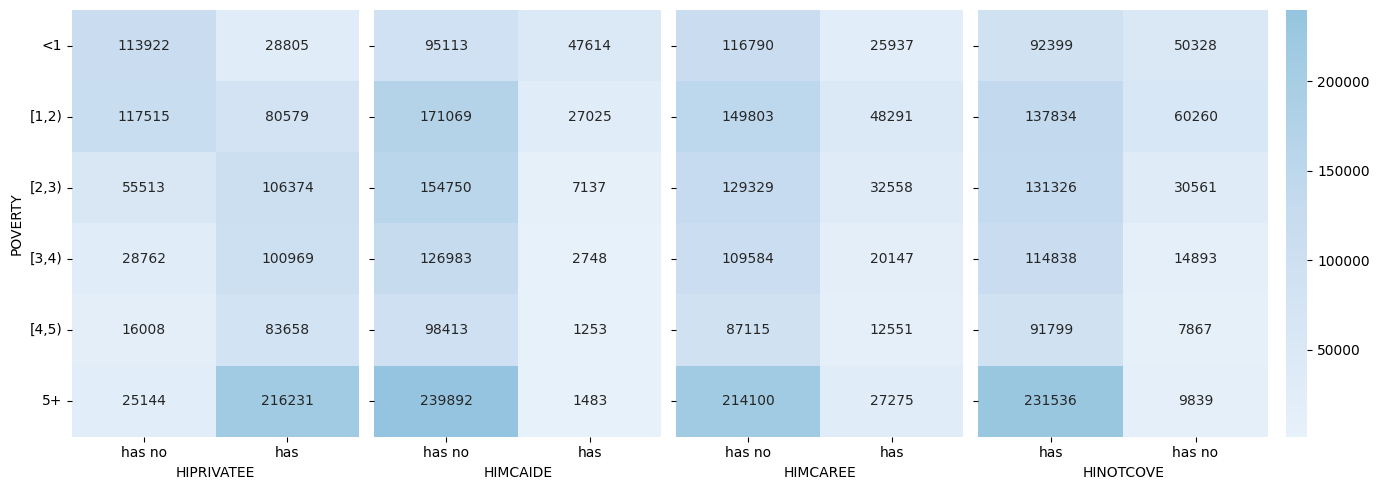

In [10]:
# create a contingency tables
poverty_hiprivatee_count = pd.crosstab(df_inst_pov['POVERTY'], df_inst_pov['HIPRIVATEE'])
poverty_himcaide_count = pd.crosstab(df_inst_pov['POVERTY'], df_inst_pov['HIMCAIDE'])
poverty_himcaree_count = pd.crosstab(df_inst_pov['POVERTY'], df_inst_pov['HIMCAREE'])
poverty_hinotcove_count = pd.crosstab(df_inst_pov['POVERTY'], df_inst_pov['HINOTCOVE'])

# labels for categories
poverty_rename = {1: '<1', 2: '[1,2)', 3: '[2,3)', 4: '[3,4)', 5: '[4,5)', 6: '5+'}
priv_name = {1: 'has no', 2: 'has'}
caide_name = {1: 'has no', 2: 'has'}
caree_name = {1: 'has no', 2: 'has'}
cove_name = {1: 'has', 2: 'has no'}

# apply the relabeling to the contingency table
poverty_hiprivatee_count.rename(index=poverty_rename, columns=priv_name, inplace=True)
poverty_himcaide_count.rename(index=poverty_rename, columns=caide_name, inplace=True)
poverty_himcaree_count.rename(index=poverty_rename, columns=caree_name, inplace=True)
poverty_hinotcove_count.rename(index=poverty_rename, columns=cove_name, inplace=True)

# find the global min and max counts for consistent color scale range
vmin = min(poverty_hiprivatee_count.min().min(),
           poverty_himcaide_count.min().min(),
           poverty_himcaree_count.min().min(),
           poverty_hinotcove_count.min().min())

vmax = max(poverty_hiprivatee_count.max().max(),
           poverty_himcaide_count.max().max(),
           poverty_himcaree_count.max().max(),
           poverty_hinotcove_count.max().max())

# get the 'BuPu' colormap 
original_cmap = plt.colormaps['Blues']  

# create a new colormap that only uses the lighter side 
new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "BuPu_half", original_cmap(np.linspace(0.08, 0.4, 256))  
)


# create a 1x4 grid of subplots (4 heatmaps side by side)
fig, axes = plt.subplots(1, 4, figsize=(14, 5), sharey=True, gridspec_kw={'width_ratios': [1, 1, 1, 1.26]})  

# plot the heatmaps with shared color scaling 
sns.heatmap(poverty_hiprivatee_count, annot=True, cmap=new_cmap, fmt='',annot_kws={'size': 10}, ax=axes[0], vmin=vmin, vmax=vmax, cbar=False)
sns.heatmap(poverty_himcaide_count, annot=True, cmap=new_cmap ,  fmt='d', annot_kws={'size': 10}, ax=axes[1], vmin=vmin, vmax=vmax, cbar=False)
sns.heatmap(poverty_himcaree_count, annot=True, cmap=new_cmap ,  fmt='d', annot_kws={'size': 10}, ax=axes[2], vmin=vmin, vmax=vmax, cbar=False)
sns.heatmap(poverty_hinotcove_count, annot=True, cmap=new_cmap ,  fmt='d', annot_kws={'size': 10}, ax=axes[3], vmin=vmin, vmax=vmax)

# set labels for all subplots
axes[0].set_xlabel('HIPRIVATEE')
axes[0].set_ylabel('POVERTY')
axes[1].set_xlabel('HIMCAIDE')
axes[1].set_ylabel('')
axes[2].set_ylabel('HIMCAREE')
axes[2].set_ylabel('')
axes[3].set_xlabel('HINOTCOVE')
axes[3].set_ylabel('')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)  


plt.tight_layout()
plt.savefig('insurance_blue.png', format='png')
plt.show()

In [11]:
# summary statistics (%)

In [12]:
df_insurance = pd.read_csv('thesis_data.csv', usecols = ['HIPRIVATEE', 'HIMCAIDE', 'HIMCAREE', 'HINOTCOVE', 'MORTSTAT']) 

In [13]:
# only samples with mortality status
df_insurance = df_insurance[(df_insurance['MORTSTAT']==2) | (df_insurance['MORTSTAT']==1)]

In [14]:
# has private insurance %
len(df_insurance[df_insurance['HIPRIVATEE']==2])/len(df_insurance[(df_insurance['HIPRIVATEE']==2) | (df_insurance['HIPRIVATEE']==1)])

0.6345571363010555

In [15]:
# has any insurance %
len(df_insurance[df_insurance['HINOTCOVE']==1])/len(df_insurance[(df_insurance['HINOTCOVE']==2) | (df_insurance['HINOTCOVE']==1)])

0.8246174084630563

In [16]:
# has Medicare insurance %
len(df_insurance[df_insurance['HIMCAREE']==2])/len(df_insurance[(df_insurance['HIMCAREE']==2) | (df_insurance['HIMCAREE']==1)])

0.18594204182136037

In [17]:
# has Medicaid insurance %
len(df_insurance[df_insurance['HIMCAIDE']==2])/len(df_insurance[(df_insurance['HIMCAIDE']==2) | (df_insurance['HIMCAIDE']==1)])

0.08199409616282566